# AR HW 1: Predicting Rainfall in Australia Using Neural Networks

## Table of Contents
1. [The Problem Statement](#1)
2. [Importing Libraries](#2)
3. [Loading the Dataset](#3)
4. [Exporatory Data Analysis](#4)
- [Initial Overview](#4.1)
5. [Target Variable Exploration (Univariate Analysis)](#5)
- [Target Variable Summary](#5.1)
6. [Feature Exploration, Cleaning, and Preprocessing (Bivariate Analysis)](#6)
- [Categorical Features](#6.1)
    - [Feature Engineering of Date Variable](#6.1.1)
        - [Handling Missing Values](#6.1.2)
        - [Encoding Variables](#6.1.3)
    - [Numerical Features](#6.2)
        - [Numerical Feature Summary](#6.2.1)
        - [Handling Missing Values](#6.2.2)
        - [Scaling Features](#6.2.3)
        - [Handling Outliers](#6.2.4)
7. [Feature Analysis (Multivariate Analysis)](#7)
    - [Heatmap](#7.1)
        - [Heatmap Summary](#7.1.1)
    - [Splitting the Dataset](#7.2)
8. [Deep Neural Network Concepts](#8)
    - [Concept Overview](#8.1)
    - [Model Evaluation and Analysis](#8.2)
9. [Model Development](#9)
    
    - [Model Training and Validation](#9.2)
10. [Hyperparameter Optimization](#10)
11. [Model Evaluation and Analysis](#11)
12. [Comparative Analysis and Reporting](#12)

## 1. The problem statement <a class="anchor" id="1"></a>

In this notebook we will try to determine whether or not it will rain in Australia tomorrow. We will implement an artificial neural network to accomplish this.


## 2. Importing Libraries <a class="anchor" id="2"></a>

Before building the model, we must import the necessary libraries.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for preprocessing, scaling, etc.
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# import model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torch.utils.data as data
import torch.nn.functional as func

# import tensorflow as tf
# from tensorflow.keras.layers import Dense,Dropout
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# mute warnings
import warnings

warnings.filterwarnings('ignore')

## 3. Loading the Dataset <a class="anchor" id="4"></a>

Now loading the Rain in Australia dataset using Pandas (dataframe).

In [3]:
data = './weatherAUS.csv'

df = pd.read_csv(data)

## 4. Exploratory Data Analysis <a class="anchor" id="4"></a>

Let us take a look at the imported data. First we can view the dimensions of the data and preview the first 5 observations of the data.

In [4]:
print(df.shape)
df.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Looks like we have $145,460$ (rows) and $23$ features (columns). Let us take a look at the list of features.

In [5]:
column_names = df.columns
column_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Viewing a summary of the data:

In [6]:
df.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

Viewing statistical properties of the dataset:

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Initial Overview <a class="anchor" id="4.1"></a>

- The dataset's features have a mix of categorical and numerical variables.

- Categorical variables have data type `object`.

- Numerical variables have data type `float64`.

- The data has some NaN values scattered throughout. Also, for some numerical features the maximum values that are far from the average, hinting toward the presence of outliers. Thus, we will have to do some data cleaning later.

- The target variable is `RainTomorrow`, for whether it will rain tomorrow in Australia or not. Thus it should be binary, taking the values `Yes` or `No`.

## 5. Target Variable Exploration (Univariate Analysis) <a class="anchor" id="5"></a>
Let's take a closer look at the target variable. Checking for missing values:

In [8]:
df['RainTomorrow'].isnull().sum()

3267

Looks like out of the total $145460$ observations, $3267$ have a missing target variable. Since the percentage of these observations is low, let us delete them:

In [9]:
df = df.dropna(subset=['RainTomorrow'])
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

Now ensuring that the target is a binary outcome:

In [10]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

What is the frequency distribution?

In [11]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

How about the percentage of this distribution?

In [12]:
df['RainTomorrow'].value_counts()/len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

Let's plot the distribution to visualize it:

<Axes: xlabel='RainTomorrow', ylabel='count'>

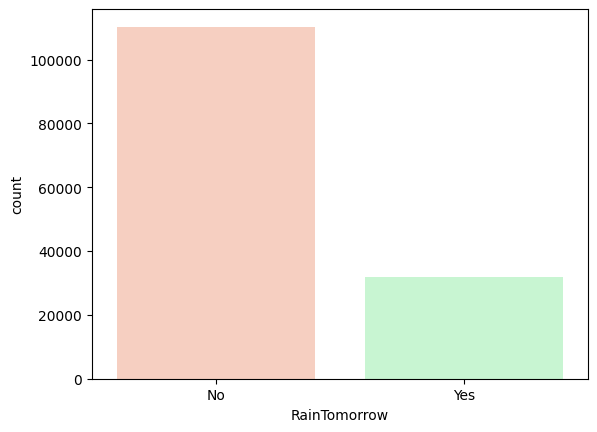

In [13]:
cols= ["#ffcbb8","#c0fcce"]
sns.countplot(x= df["RainTomorrow"], palette= cols)

Also doing text preprocessing for the target variable:

In [14]:
df["RainTomorrow"].replace({"No":0,"Yes":1},inplace=True)

### Target Variable Summary <a class="anchor" id="5.1"></a>
- `RainTomorrow` is a binary variable with the two unique values `No` and `Yes`.
- `No` appears $110316$ times, which is $77.58\%$ of the time.
- `Yes` appears $31877$ times, which is $22.42\%$ of the time.
- The plot confirms the above information.

## 6. Feature Exploration, Cleaning, and Preprocessing (Bivariate Analysis)<a class="anchor" id="6">
Through EDA we found our features can be either categorical variables or numerical ones. Let us examine the categorical variables first.
    
### Categorical Features <a class="anchor" id="6.1">
Finding the categorical variables:

In [15]:
# Categorical variables have data type object
categorical = [var for var in df.columns if df[var].dtype=='O']

print('The {} categorical variables are:\n'.format(len(categorical)), categorical)

The 6 categorical variables are:
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Strangely Date is a categorical variable. Let's preview the data to investigate:

In [16]:
# Preview categorical variables
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2008-12-01,Albury,W,W,WNW,No
1,2008-12-02,Albury,WNW,NNW,WSW,No
2,2008-12-03,Albury,WSW,W,WSW,No
3,2008-12-04,Albury,NE,SE,E,No
4,2008-12-05,Albury,W,ENE,NW,No


Also looking at the cardinality of cateogorical variables:

In [17]:
for col in categorical:
    print(f"{col}: {df[col].nunique()}")

Date: 3436
Location: 49
WindGustDir: 16
WindDir9am: 16
WindDir3pm: 16
RainToday: 2


Looks like the Dates (of type object and has high cardinality) should be parsed into datetime. So we really have 6 categorical variables, and 5 categorical features excluding the target variable.



#### Feature Engineering of Date Variable <a class="anchor" id="6.1.1">

In [18]:
# Checking for null Dates
df['Date'].isnull().sum()

0

In [19]:
# parse the dates, currently coded as strings, into datetime format
df['Date'] = pd.to_datetime(df['Date'])

# extract year from date
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [20]:
# extract month from date
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [21]:
# extract day from date
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [22]:
# drop the original Date variable
df.drop('Date', axis=1, inplace = True)

In [23]:
# view updated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

#### Handling Missing Values <a class="anchor" id="6.1.2">

Let us handle any missing values for our categorical variables by replacing them with the most common value or mode. Viewing how many missing values we're dealing with:

In [24]:
# Get a new list of categorical variables (
s = (df.dtypes == "object")
categorical = list(s[s].index)
categorical_features = [feature for feature in categorical if feature != 'RainTomorrow']
# Display missing values for categorical features
print("Missing Value Count for categorical variables - ")
for feature in categorical_features:
    print(feature,":", df[feature].isnull().sum())

Missing Value Count for categorical variables - 
Location : 0
WindGustDir : 9330
WindDir9am : 10013
WindDir3pm : 3778
RainToday : 1406


In [25]:
# Filling missing values with mode of each column
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

Note that we did not modify `Location` or the target `RainTomorrow` because there are no missing values for those variables.

In [26]:
# Display missing values for categorical variables
print("Missing Value Count for categorical variables - ")
for feature in categorical_features:
    print(feature,":", df[feature].isnull().sum())

Missing Value Count for categorical variables - 
Location : 0
WindGustDir : 0
WindDir9am : 0
WindDir3pm : 0
RainToday : 0


#### Encoding Variables <a class="anchor" id="6.1.3">
Now we must do a label encoding of the categorical variables, so that the neural network can work with them:

In [27]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

Looks like the categorical features have been encoded properly.

### Numerical Features <a class="anchor" id="6.2">
Now let's explore the numerical features:

In [28]:
# non-categorical variables are numerical variables
numerical = [var for var in df.columns if var not in categorical]

# Exclude specific columns from the list
columns_to_exclude = ['Year', 'Month', 'Day', 'RainTomorrow']
numerical = [col for col in numerical if col not in columns_to_exclude]

print('The {} numerical variables are:\n'.format(len(numerical)), numerical)
df[numerical].head()

The 16 numerical variables are:
 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


#### Numerical Feature Summary  <a class="anchor" id="6.2.1"></a>


- There are 16 numerical features.


- These are given by `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.


- All of the numerical variables are of continuous type.
- There are some outliers (refer to Initial Overview) and missing values we must handle.

#### Handling Missing Values <a class="anchor" id="6.2.2"></a>

In [29]:
# check missing values in numerical variables
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

Looks like all of the numerical features have missing values. Two ways to handle these are to median inputation or random sample imputation. Since there are outliers in our data, we can use median imputation to replace the missing values with the feature medians which are robust to outliers:

In [30]:
# for each feature, replace missing values with median
for feature in numerical:
    df[feature].fillna(df[feature].median(), inplace=True)

# verify that there are no missing values
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

#### Scaling Features <a class="anchor" id="6.2.3"></a>

In [31]:
target = df['RainTomorrow']

# Select only the columns to be scaled (excluding 'RainTomorrow')
cols_to_scale = df.columns[df.columns != 'RainTomorrow']

# Set up a standard scaler for the selected columns
std_scaler = preprocessing.StandardScaler()

# Scale the selected columns and create a DataFrame with the scaled values
scaled_features = std_scaler.fit_transform(df[cols_to_scale])
df[cols_to_scale] = scaled_features

# Verify the changes
print(df.describe().T)

                  count          mean       std       min       25%       50%  \
Location       142193.0  2.398575e-17  1.000004 -1.667479 -0.894869  0.018216   
MinTemp        142193.0  3.166118e-16  1.000004 -3.237728 -0.717738 -0.029045   
MaxTemp        142193.0  3.421966e-16  1.000004 -3.941909 -0.749039 -0.087961   
Rainfall       142193.0  8.594892e-17  1.000004 -0.276125 -0.276125 -0.276125   
Evaporation    142193.0 -1.071363e-16  1.000004 -1.627183 -0.371450 -0.120303   
Sunshine       142193.0  7.259686e-16  1.000004 -2.903725  0.056962  0.165280   
WindGustDir    142193.0 -1.471126e-16  1.000004 -1.716789 -0.864683  0.200450   
WindGustSpeed  142193.0  1.778943e-16  1.000004 -2.581325 -0.678822 -0.070021   
WindDir9am     142193.0 -5.756579e-17  1.000004 -1.550574 -0.886072 -0.000070   
WindDir3pm     142193.0  3.837719e-17  1.000004 -1.713146 -0.833311  0.046525   
WindSpeed9am   142193.0 -7.915296e-17  1.000004 -1.580789 -0.789970 -0.112126   
WindSpeed3pm   142193.0  1.0

#### Handling Outliers <a class="anchor" id="6.2.4"></a>
Using a boxplot to visualize outliers:

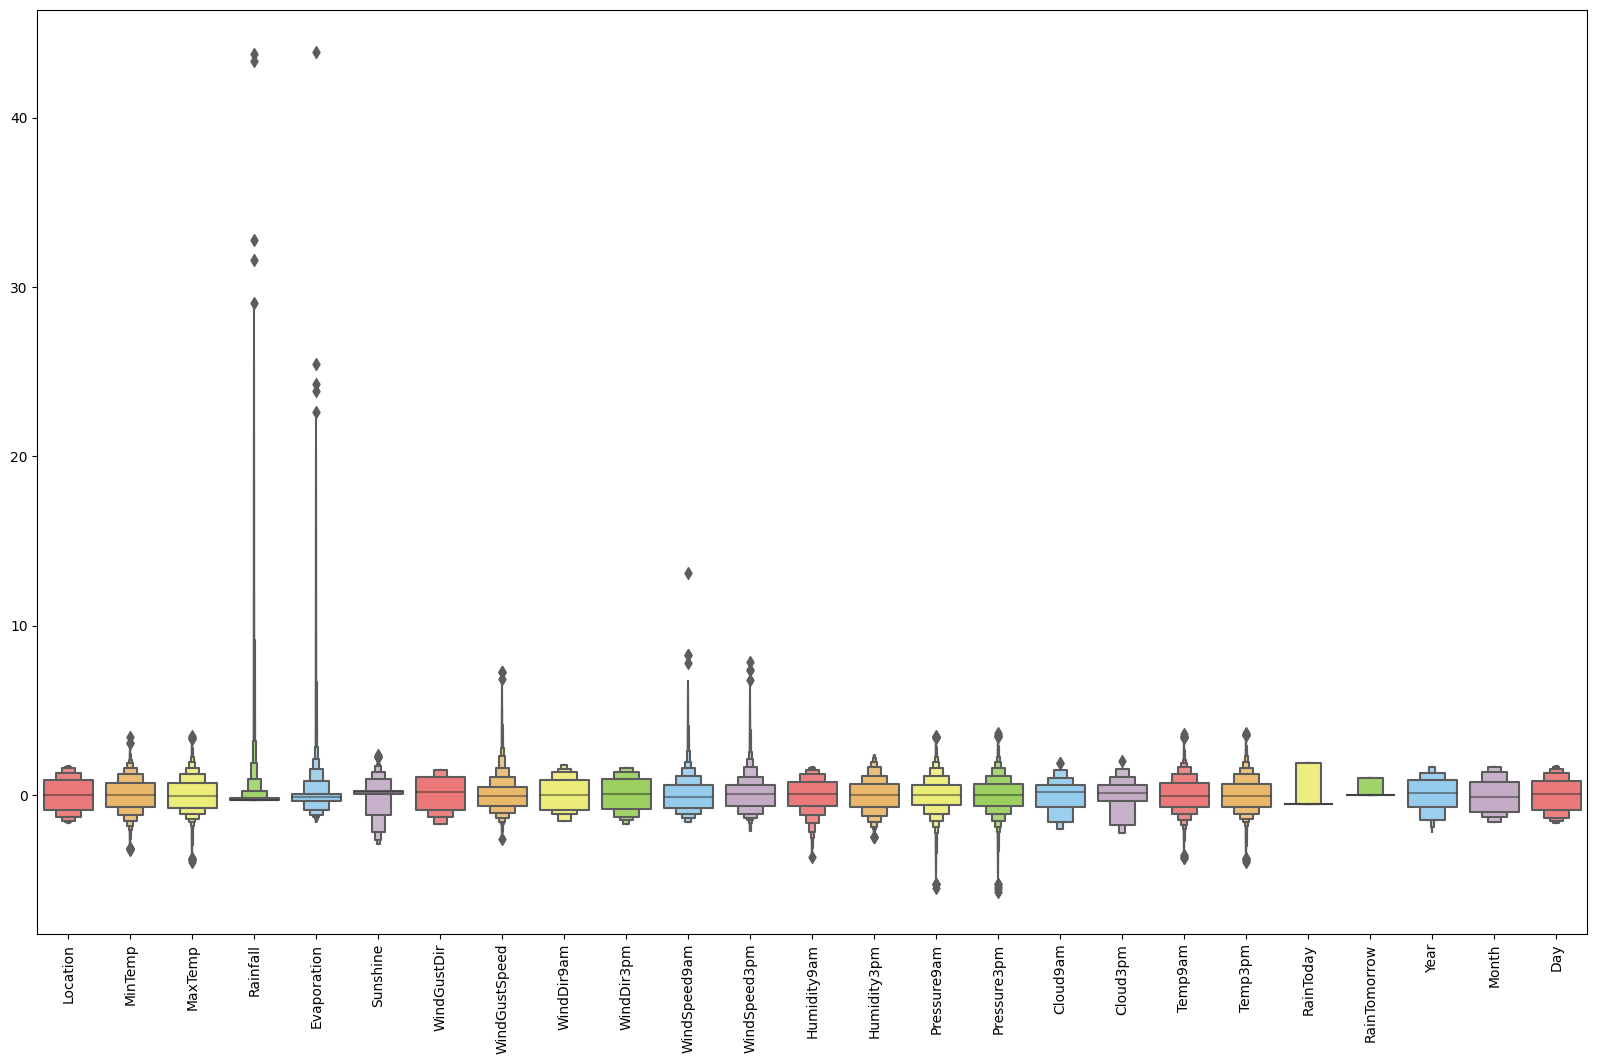

In [32]:
#looking at the scaled features
colors = ["#ff6666", "#ffbd55", "#ffff66", "#9de24f", "#87cefa", '#C8A8CB']
plt.figure(figsize=(20,12))
sns.boxenplot(data = df,palette = colors)
plt.xticks(rotation=90)
plt.show()

Let's drop outliers based on the IQR (Inter Quartile Range):

In [33]:
for col in ['WindSpeed9am', 'WindSpeed3pm', "Pressure9am", "Pressure3pm", "Temp9am",
            "Temp3pm", "WindGustSpeed", "MaxTemp", "MinTemp", "Humidity3pm", "Humidity9am"]:
    q1=np.quantile(df[col],0.25)
    q3=np.quantile(df[col],0.75)
    iqr=q3-q1

    lower=round(q1-1.5*iqr,2)
    upper=round(q3+1.5*iqr,2)
    df=df[(df[col]<upper)&(df[col]>lower)]

# removing the single-sided outliers manually
df = df[(df["Rainfall"]<4)]
df = df[(df["Evaporation"]<6)]
df = df[(df["Sunshine"]<2.1)]
df = df[(df["Humidity9am"]>-3)]
df = df[(df["Humidity3pm"]>-2.2)]
df = df[(df["Cloud9am"]<1.8)]
df = df[(df["Cloud3pm"]<2)]

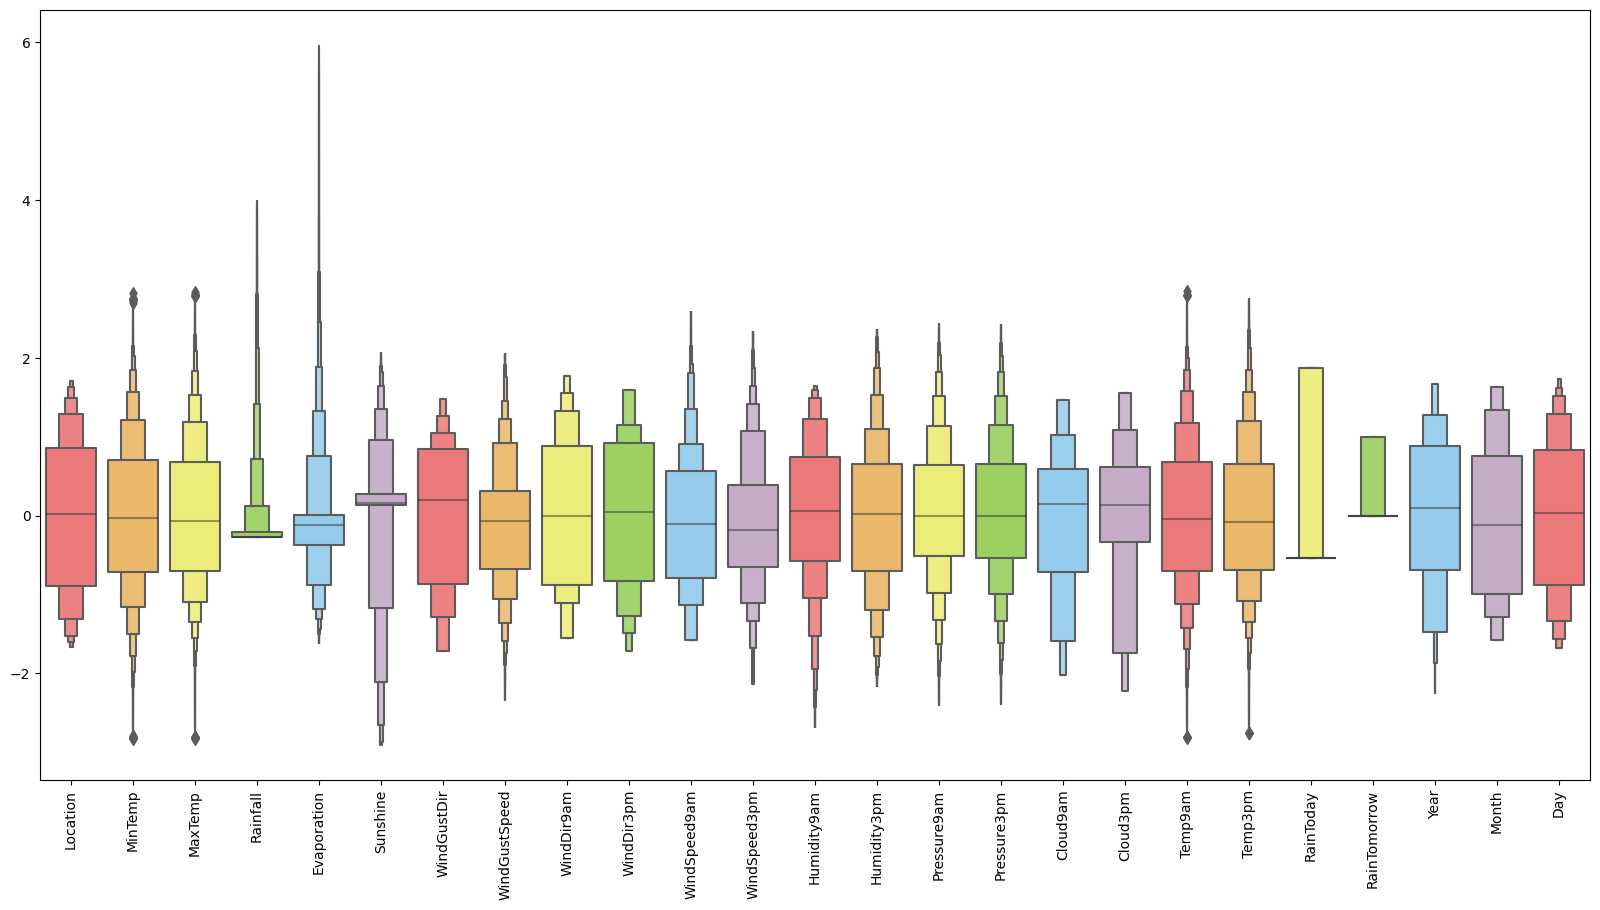

In [34]:
#looking at the scaled features without outliers

colors = ["#ff6666", "#ffbd55", "#ffff66", "#9de24f", "#87cefa", '#C8A8CB']
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = colors)
plt.xticks(rotation=90)
plt.show()

Looks good. Now we can split the data in training and testing sets.

### Splitting the Dataset <a class="anchor" id="7.2"></a>

In [35]:
X = df.drop(['RainTomorrow'], axis=1)
y = df["RainTomorrow"]

# Splitting the test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 7. Feature Analysis (Multivariate Analysis)<a class="anchor" id="7"></a>
To see what features are most relevant to predicting whether it will rain tomorrow, we can use a heatmap to visualize the correlation matrix between the features and target variable.

### Heatmap <a class="anchor" id="7.1"></a>

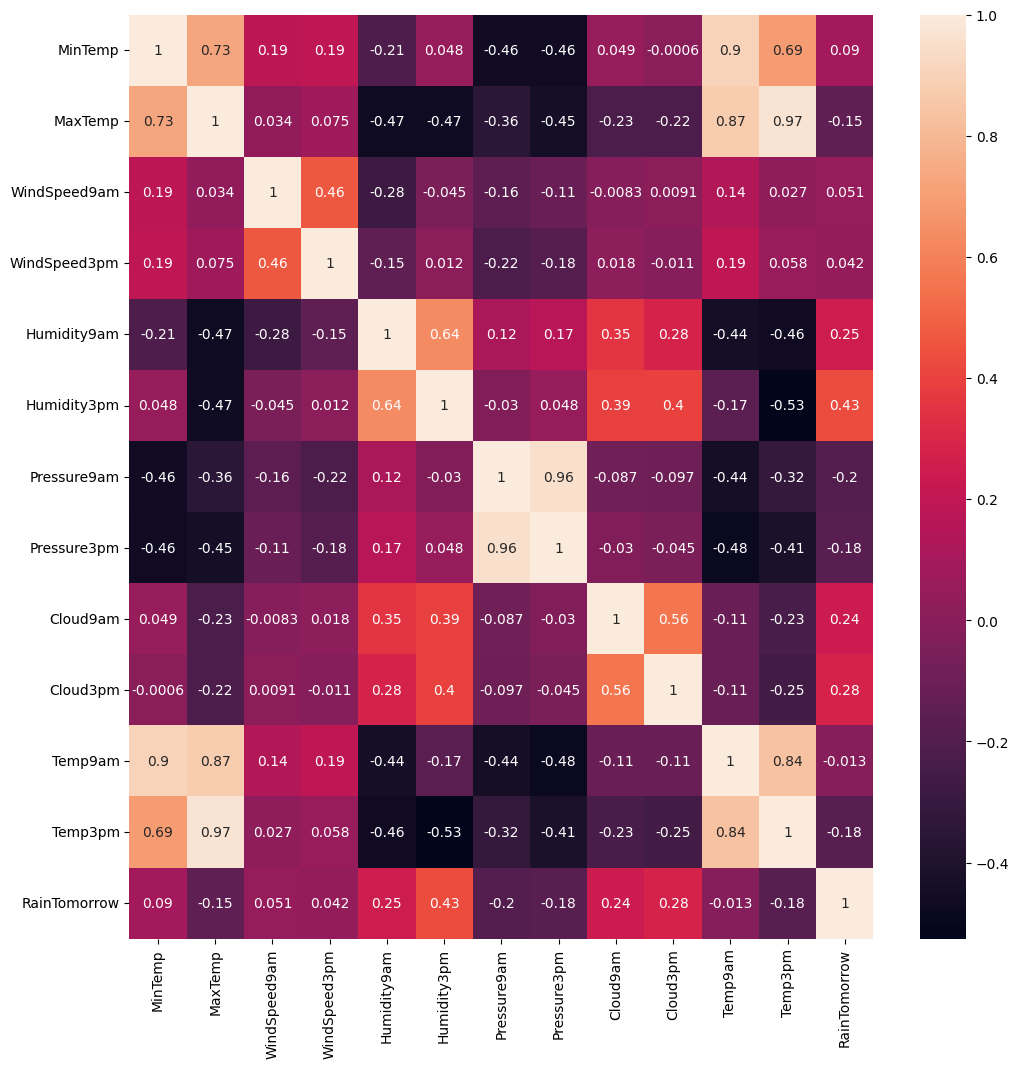

In [36]:
train=pd.concat([X_train,y_train],axis=1,join="inner")
test=pd.concat([X_test,y_test],axis=1,join="inner")
col=['MinTemp', 'MaxTemp', 'WindSpeed9am','WindSpeed3pm',
     'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm',
     'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm','RainTomorrow']

plt.figure(figsize=(12,12))
ax= sns.heatmap(train[col].corr(),annot=True);
plt.show()

#### Heapmap Interpretation <a class="anchor" id="7.1.1"></a>


From the above correlation heat map, we can conclude that :-
- The variables related to temperature, pressure, and clouds are strongly correlated with one another.
- The variables that seem most correlated with the target are `MaxTemp`, `Temp3pm`, and `Humidity 3pm` as their absolute value is higher.
- It's hard to say that any feature should be excluded from our data because there may be hidden relationships that are relevant to our prediction for the target.

## Deep Neural Network Concepts <a class="anchor" id="8">
    
In the following section I will summarize key concepts of deep neural networks, focusing on model architectures relevant to time-series data. I will also explain the advantages of using deep neural networks when making sense of complex patterns that exist within in data, including the dataset at hand.
    
### Concepts Overview <a class="anchor" id="8.1">
   
To understand a deep neural network, it may be useful to go over neural networks in general. **Neural Networks** are composed of **layers of neurons** that take after biological neurons like in our brains. Each **neuron** applies an activation function to its input, determining the output response. The **layers** consist of the input layer, hidden layers, and output layers. The input layer is the first layer that takes the data, the hidden layers process the output of the first layer, and the output layer produces the predictions. The term 'hidden' refers to how the output of the layers are not directly observed in the training data. Neural networks also have **weights and biases**. The weights are parameters that the network learns during training, which determines how connected the neurons are. The biases are additional parameters that can allow neurons to activate even when the input is negligible. To update these parameters, a technique called backpropagation is used, which involves a **gradient descent** algorithm using partial differentiation. This is to compute the gradients of the **loss function** with respect to the weights and biases. The **loss function** is used to measure the difference between the predictions and actual target values.

To give a basic description of **deep neural networks**, they are neural netowrks with multiple hidden layers. There are several types of deep neural networks, and one that is useful for processing time-series data is a **recurrent neural network (RNN)**. Some types of RNNs are Gated Reccurent Unit (GRU) or Long Short-Term Memory (LSTM). The one we will implement in this notebook is an LSTM, which uses memory cells that store and retrieve information over long sequences, and is particularly useful for addressing the **vanishing gradient problem**. This problem exists for other models where the gradients involved become too small to work with. The **LSTM** is particularly useful for capturing long-term relationships, which is relevant for time-series data (i.e. the Rain in Australia dataset).
    
### Concepts Overview <a class="anchor" id="8.2">
    
Alongside that advantage, deep neural networks have several advantages for processing data with complex relationships:
- Feature learning: automatically extracts relevant features in the data, reducing the need for manual data processing and feature engineering.
- Non-linearity: they can capture non-linear relationships in the data.
- Adaptibility: effective in adapting to varying patterns and trends over time.

## Model Development <a class="anchor" id="9"></a>
    
Let's use pytorch to build a LSTM model that will be trained using our scaled and processed dataset. First, we need to convert our split dataset into tensors so that the model can use them. Tensors are multi-dimensional matrices that represent data of different types.

In [37]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

### Model Architecture <a class="anchor" id="9.1"></a>
Now let us define a function to build a LSTM deep learning neural network using pytorch. The LSTM will have the following architecture:
- Input Layer: LSTM layer with input shape that matches the number of features (22) and has `hidden_size` hidden units. This layer has a dropout rate of `dropout_rate`
- Second layer: LSTM layer with input size `hidden_size` and output size of half that of `hidden_size`. This layer has a dropout rate of `dropout_rate`
- Third layer: Fully connected layer with input size half of `hidden_size` and an output size of a fourth of `hidden_size`. This layer's activation function is recified linear units, which is standard for fully connected layers.
- Fourth layer: Fully connnected layer with an input size that is a fourth of the `hidden_size`, and an output size of 1. This layer's activation function is a sigmoid function that turns the output value into the final binary prediction.

In [38]:
# class to make an lstm with the arguments for number of features, hidden unit size, and dropout rate
class LSTM(nn.Module):
    def __init__(self, n_features, hidden_size, dropout_rate, num_layers):
        super(LSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size=n_features, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=dropout_rate)
        self.fc1 = nn.Linear(hidden_size, hidden_size//2)
        self.fc2 = nn.Linear(hidden_size//2, 1)
    def forward(self, x):
        x, _ = self.lstm1(x)
        x = func.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

In [39]:
# getting number of features in training set
num_samples, num_features = X_train.size()

# example of creating a LSTM model with training data shape, 100 hidden_units, a dropout rate of 0.3, and one layer
model = LSTM(num_features, 100, 0.3, 1)

In [40]:
# our loss criteria is Binary Cross-Entropy, as it's appropriate for binary classification tasks.
criterion = nn.BCELoss()

# we use Adam as our optimization algorithm with a learning rate of 0.01
optimiser = optim.Adam(model.parameters(), lr = 0.01)

# checking for gpu
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

model = model.to(device)

# define the loss function to compare the output with the target
criterion = criterion.to(device)

In [41]:
# defining a function to calculate the accuracy for predictions
def calculate_accuracy(y_true, y_pred):
    # take values >= 0.5 to be 1, which means it will rain tomorrow
    predicted = y_pred.ge(.5).view(-1)
    # return the accuracy as a percentage
    return (y_true == predicted).sum().float() / len(y_true)

In [42]:
# round tensor for readability
def round_tensor(t, decimal_places = 3):
    return round(t.item(), decimal_places)

### Model Training and Validation <a class="anchor" id="9.2">
    
Let's train our model above on our training data, and see its accuracy using the validation set:

In [43]:
for epoch in range(76):
    y_pred = model(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % 5 == 0:
        y_test_pred = model(X_test)
        y_test_pred = torch.squeeze(y_test_pred)
        test_loss = criterion(y_test_pred, y_test)
        test_acc = calculate_accuracy(y_test, y_test_pred)
        print (str('epoch ') + str(epoch) + " - loss: "+ str(round_tensor(test_loss)) + str(', accuracy: ') + str(round_tensor(test_acc)))
    optimiser.zero_grad()
    train_loss.backward()
    optimiser.step()

epoch 0 - loss: 0.658, accuracy: 0.793
epoch 5 - loss: 0.472, accuracy: 0.793
epoch 10 - loss: 0.414, accuracy: 0.808
epoch 15 - loss: 0.384, accuracy: 0.832
epoch 20 - loss: 0.38, accuracy: 0.829
epoch 25 - loss: 0.367, accuracy: 0.842
epoch 30 - loss: 0.361, accuracy: 0.844
epoch 35 - loss: 0.358, accuracy: 0.847
epoch 40 - loss: 0.356, accuracy: 0.848
epoch 45 - loss: 0.353, accuracy: 0.85
epoch 50 - loss: 0.349, accuracy: 0.85
epoch 55 - loss: 0.347, accuracy: 0.851
epoch 60 - loss: 0.346, accuracy: 0.852
epoch 65 - loss: 0.344, accuracy: 0.852
epoch 70 - loss: 0.343, accuracy: 0.852
epoch 75 - loss: 0.342, accuracy: 0.852


Looks like this LSTM did a decent job of predicting the target, having around $85\%$ accuracy. Now we should find which hyperparameters yield the best model, to see if we can get any kind of improvement.

## Hyperparameter Tuning  <a class="anchor" id="10"></a>
    
It's important to tune the hyperparameters of the neural network because we can get a better performance, with respect to both accuracy and speed, with different hidden layer sizes, activation functions, optimization algorithms, batch sizes, etc. This is because we can help the model generalize to unseen data and avoid overfitting or underfitting.]

Here, we use a range of values for the hidden unit size, dropout rate, and learning rate to evaluate which combination yields the best model:

In [46]:
import itertools

# Define the hyperparameters
hidden_size_list = [50, 75]
dropout_rate_list = [0.8, 0.5, 0.3]
lr_list = [0.1, 0.01]
layer_count_list = [1, 2]

best_accuracy = 0.0
best_model = None

# Iterate over all combinations of hyperparameters
for hidden_size, dropout_rate, lr, layer_count in itertools.product(hidden_size_list, dropout_rate_list, lr_list, layer_count_list):
    # Create the model
    model = LSTM(num_features, hidden_size, dropout_rate, layer_count)
    model = model.to(device)

    # Define the loss criterion
    criterion = nn.BCELoss()
    criterion = criterion.to(device)

    # Define the optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Train the model
    for epoch in range(100):
        y_pred = model(X_train)
        y_pred = torch.squeeze(y_pred)
        train_loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

    # Evaluate the model on the test set
    y_test_pred = model(X_test)
    y_test_pred = torch.squeeze(y_test_pred)
    test_loss = criterion(y_test_pred, y_test)
    test_acc = calculate_accuracy(y_test, y_test_pred)

    # Print and store the results
    print(f"hidden_size: {hidden_size}, dropout_rate: {dropout_rate}, lr: {lr}, layers: {layer_count}, test_accuracy: {test_acc}")

    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_model = model

print("Best model accuracy:", best_accuracy)

hidden_size: 50, dropout_rate: 0.8, lr: 0.1, layers: 1, test_accuracy: 0.8423038125038147
hidden_size: 50, dropout_rate: 0.8, lr: 0.1, layers: 2, test_accuracy: 0.8393871188163757
hidden_size: 50, dropout_rate: 0.8, lr: 0.01, layers: 1, test_accuracy: 0.8542428016662598
hidden_size: 50, dropout_rate: 0.8, lr: 0.01, layers: 2, test_accuracy: 0.8482149839401245
hidden_size: 50, dropout_rate: 0.5, lr: 0.1, layers: 1, test_accuracy: 0.8338648080825806
hidden_size: 50, dropout_rate: 0.5, lr: 0.1, layers: 2, test_accuracy: 0.8460760712623596
hidden_size: 50, dropout_rate: 0.5, lr: 0.01, layers: 1, test_accuracy: 0.8546317219734192
hidden_size: 50, dropout_rate: 0.5, lr: 0.01, layers: 2, test_accuracy: 0.8517538905143738
hidden_size: 50, dropout_rate: 0.3, lr: 0.1, layers: 1, test_accuracy: 0.8525705933570862
hidden_size: 50, dropout_rate: 0.3, lr: 0.1, layers: 2, test_accuracy: 0.8510149717330933
hidden_size: 50, dropout_rate: 0.3, lr: 0.01, layers: 1, test_accuracy: 0.8527650237083435
hidde

In [47]:
# Assuming X_test is your input tensor
X_test = X_test.to('cuda:0')  # Move the input tensor to GPU

# Make predictions
y_pred = best_model(X_test)

# Threshold the predictions (any value > 0.5 is taken as 1, for it should rain tomorrow)
y_pred = (y_pred > 0.5)

## Model Evaluation and Analysis <a class="anchor" id="11"></a>
    
Taking at the confusion matrix and then metrics like recall, f1-score, accuracy:

<Axes: >

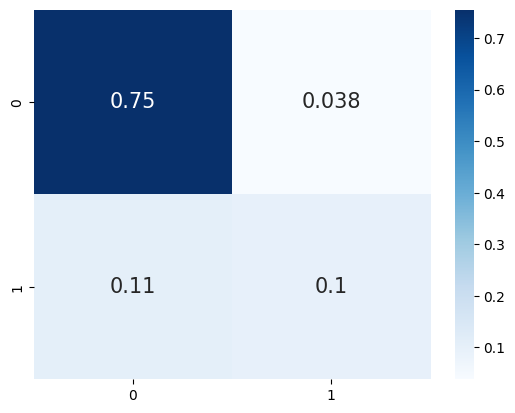

In [48]:
# move tensors to cpu
y_test = y_test.cpu()
y_pred = y_pred.cpu()

# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cf_matrix / np.sum(cf_matrix), cmap="Blues", annot=True, annot_kws={'size': 15})

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     20399
         1.0       0.72      0.48      0.58      5315

    accuracy                           0.85     25714
   macro avg       0.80      0.72      0.75     25714
weighted avg       0.84      0.85      0.84     25714



## Comparative Analysis and Reporting  <a class="anchor" id="11"></a>

To summarize, I used pytorch to create a deep learning neural network, specifically an LSTM. This LSTM was then used to predict if it would rain tomorrow in Australia using the provided dataset from kaggle. Previously, I used tensorflow to create a multilayer fully connected neural network model for the same purpose.

Previously, we generally did well for predicting that it was not going to rain. That is, we had  74%
  true negatives,  4%
  false positives,  12%
  false negatives, and  10%
  true positives. We could have had a better rate for predicting if it would rain because we got it correct  55%
  of the time. However, getting the prediction for no rain right  90%
  of the time is not bad. Also, our accuracy was around $84\%$. So overall, we had good results.
  
In terms of performance, the best LSTM beat our previous neural network having an accuracy of around $85\%$. However, it is not certain that this improvement came from the model or if it was a result reversing some feature engineering we did (previously we removed some features and replaced them with differences between feautres, which may have been removing too much information). Either way, I was able to get a model with  highest f1 score (and scores for positive and negative predictions) and accuracy through hyperparameter tuning.

As for the experience, I definitely learned that pytorch is similar to the previously used tensorflow, but there are still major differences. They both have the customizability of layers, but i would argue that tensorflow has more customizability, at least in my experience. But pytorch seemed more simple and user-friendly because it was relatively easy to pickup.

Perhaps the most important thing I learned was that thinking about computing resources when doing any deep learning or even machine learning for that matter is extremely important. This is due to how I was running this notebook on my own computer, kaggle's vm, and finally on Google Colab. The free GPU provided definitely helped with speeding up the hyperparameter tuning process, and helped me get results. Although the point of this notebook was not to optimize the speed of the LSTM or finding the best one, one could find it useful to explore ways for accomplishing that.

For further exploration, different LSTM architectures could be explored. For example, what would happen if I used more or less fully connected layers? What about LSTM layers? We also did not incorporate batch size in this notebook, but doing so may lead to an imrpovement. Thus, different hyperparameters could also be manipulated such as batch size, the choice of optimization algorithm used, or just different ranges of values that we did tune.